In [1]:
import matplotlib.pyplot as plt 
import glob 

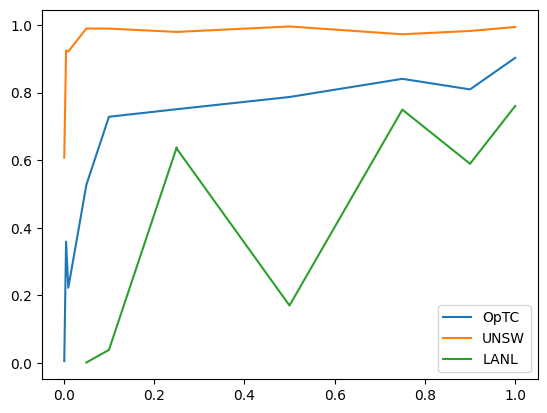

In [4]:
def get_score(f): 
    with open(f, 'r') as f_: 
        logs = f_.read().split('\n')[1:6]

    best_val = 0 
    ap,auc = 0,0
    for l in logs: 
        if not l: 
            continue
        
        row = [float(s) for s in l.split(',')]
        v = row[4]
        if v > best_val: 
            best_val = v 
            auc = row[2]
            ap = row[3]

    return auc,ap
    
normal_score = {
    'optc': [1.0, 0.9877, 0.9025],
    'unsw': [1.0, 0.9951, 0.9938],
    'lanl14argus': [1.0, 0.9993523204860715,0.7600463223970952]
}

def load_scores(ds): 
    files = glob.glob(f'../results/training_data_ablation/{ds}/*.txt')
    
    stats = [normal_score[ds]]
    for file in files: 
        pct = file.split('_')[-3].replace('pct', '')
        pct = float(pct)
        stats.append([pct, *get_score(file)])

    stats.sort(key=lambda x : x[0])
    return stats 

def plot_scores(scores, label): 
    x,auc,ap = zip(*scores)
    plt.plot(x, ap, label=label)

plot_scores(load_scores('optc'), 'OpTC')
plot_scores(load_scores('unsw'), 'UNSW')
plot_scores(load_scores('lanl14argus'), 'LANL')
plt.legend()
plt.show()